# Tokenization Strategies: A Comprehensive Comparison

This project explores different **tokenization** strategies and their impact on vocabulary size and sequence length. Tokenization is the process of breaking text into smaller units (tokens) that can be processed by machine learning models.

## Overview

I implemented and compared four tokenization strategies:
- **Character-level tokenization**
- **Word-level tokenization** 
- **Phrase-level tokenization (using bigrams)**
- **Subword tokenization using Byte-Pair Encoding (BPE)**

## Features

- ✅ Character-level tokenizer implementation
- ✅ Word-level tokenizer with whitespace splitting
- ✅ Bigram frequency computation and phrase-level tokenization
- ✅ Complete Byte-Pair Encoding (BPE) algorithm implementation
- ✅ Comprehensive evaluation metrics (vocabulary size vs sequence length)
- ✅ Data visualization and analysis
- ✅ Performance comparison across all strategies

## Project Goals

This project demonstrates how different tokenization approaches affect:
- Vocabulary size (number of unique tokens)
- Sequence length (average tokens per sentence)
- Trade-offs between granularity and efficiency


## Dataset

This project uses an excerpt from *Alice's Adventures in Wonderland* (Chapter 1) as the sample corpus, stored as `sample_text.txt` in the repository. The text is adapted from a public‑domain edition.

Feel free to swap in your own text file for experiments.


## 1. Preprocessing

Minimal preprocessing is applied:

- Lowercase the text (so `Alice` and `alice` match)
- Replace newline characters with spaces
- Keep punctuation attached to words for simplicity

Function: `preprocess_text(text: str) -> str` returns the cleaned text. See the docstring examples for expected behavior.


In [31]:
def preprocess_text(text: str) -> str:
    """Preprocess the input text by lowercasing and replacing newlines with spaces.

    Parameters
    ----------
    text : str
        Raw text from the corpus, potentially containing newlines.

    Returns
    -------
    str
        A cleaned, lowercase string with newlines replaced by single spaces.

    Examples
    --------
    >>> preprocess_text('Hello\nWorld!')
    'hello world!'
    >>> preprocess_text('A\nB\nC')
    'a b c'
    """

    # TODO: implement preprocessing (lowercase and replace newlines with spaces)
    
    text = text.lower()
    text = text.replace("\n"," ")
    return text

## 2. Character-Level Tokenization

Each character (including spaces and punctuation) becomes a token. This yields the **smallest vocabulary** but the **longest sequences**.

Function: `char_tokenize(text: str) -> list[str]` should return the list of characters unchanged.

Examples:

```python
>>> char_tokenize('abc')
['a', 'b', 'c']
>>> char_tokenize('a b')
['a', ' ', 'b']
```


In [34]:
def char_tokenize(text: str) -> list[str]:
    """Tokenize the input string into individual characters.

    Parameters
    ----------
    text : str
        A preprocessed string (lowercase with spaces instead of newlines).

    Returns
    -------
    list[str]
        A list of characters, including spaces and punctuation.

    Examples
    --------
    >>> char_tokenize('abc')
    ['a', 'b', 'c']
    >>> char_tokenize('a b')
    ['a', ' ', 'b']
    """
    # TODO: implement character-level tokenization
    tokens = list(text)
    return tokens


## 3. Word-Level Tokenization

Split on whitespace. Punctuation remains attached to words. This typically produces a **large vocabulary** but much **shorter sequences** than character-level tokenization.

Function: `word_tokenize(text: str) -> list[str]` returns a list of words.


In [37]:
def word_tokenize(text: str) -> list[str]:
    """Tokenize the input string on whitespace.

    Parameters
    ----------
    text : str
        A preprocessed string with lowercase letters and spaces.

    Returns
    -------
    list[str]
        A list of word tokens.

    Examples
    --------
    >>> word_tokenize('hello world!')
    ['hello', 'world!']
    >>> word_tokenize('multiple   spaces here')
    ['multiple', 'spaces', 'here']
    """
    # TODO: implement word-level tokenization
    tokens = text.split()
    return tokens


## 4. Phrase-Level Tokenization via Bigrams

Merge frequently occurring bigrams (adjacent word pairs) into single tokens such as `white_rabbit`. This can reduce sequence length at the cost of a larger vocabulary.

Steps:
- Compute bigram frequencies over the corpus
- Select the top N bigrams (N=5 here)
- Greedily merge matches left-to-right

Functions:
- `compute_bigram_frequencies(tokens: list[str]) -> dict[tuple[str,str], int]`
- `phrase_tokenize(tokens: list[str], bigrams: list[tuple[str,str]]) -> list[str]`


In [40]:
def compute_bigram_frequencies(tokens: list[str]) -> dict[tuple[str, str], int]:
    """Compute frequencies of adjacent token pairs.

    Parameters
    ----------
    tokens : list[str]
        A list of tokens (words) from the corpus.

    Returns
    -------
    dict[tuple[str,str], int]
        A dictionary mapping each bigram (pair of tokens) to its count.
    """
    # TODO: implement bigram frequency counting
    brigram_frequency = {}
    for i in range(len(tokens) - 1):
        bigram = (tokens[i], tokens[i+1])
        if bigram in brigram_frequency:
            brigram_frequency[bigram] += 1
        else:
            brigram_frequency[bigram] = 1
    return brigram_frequency
    
def phrase_tokenize(tokens: list[str], bigrams: list[tuple[str, str]]) -> list[str]:
    """Merge selected bigrams into single phrase tokens.

    Parameters
    ----------
    tokens : list[str]
        A list of word tokens.
    bigrams : list[tuple[str,str]]
        A list of bigrams (tuples of two tokens) to merge.

    Returns
    -------
    list[str]
        The token list with specified bigrams merged into single tokens joined by an underscore.
    """
    # TODO: implement phrase-level tokenization using the provided bigrams
    merged_tokens = []
    i=0
    while i < len(tokens):
        if i< len(tokens) - 1 and (tokens[i], tokens[i+1]) in bigrams:
            merged_tokens.append(tokens[i] + "_" + tokens[i+1])
            i += 2
        else:
            merged_tokens.append(tokens[i])
            i += 1
    return merged_tokens

## 5. Subword Tokenization via Byte-Pair Encoding (BPE)

BPE merges the most frequent adjacent symbol pairs iteratively to build a subword vocabulary. Words are treated as sequences of characters plus a special end‑of‑word symbol `</w>`.

Training loop:
1. Count all adjacent symbol pairs
2. Merge the most frequent pair everywhere
3. Record the merge and repeat for `num_merges`

Encoding applies the learned merges in order to split words into subword units (excluding the end‑of‑word symbol in the final output).

Functions:
- `bpe_train(corpus: list[str], num_merges: int) -> list[tuple[str, str]]`
- `bpe_encode(word: str, merges: list[tuple[str, str]]) -> list[str]`


In [43]:
def bpe_train(corpus: list[str], num_merges: int) -> list[tuple[str, str]]:
    """Train a simple BPE tokenizer.

    Parameters
    ----------
    corpus : list[str]
        A list of word tokens in the corpus. Each word will be represented as a list of characters plus an end-of-word symbol during training.
    num_merges : int
        The number of pair merges to perform.

    Returns
    -------
    list[tuple[str, str]]
        The list of merged symbol pairs in the order they were applied.
    """
    # TODO: implement BPE training on the full corpus
    merges = []
    corpus_tokens = []
    
    for word in corpus:
        word_chars = list(word) + ["</w>"]
        corpus_tokens.append(word_chars)
    
    for _ in range(num_merges):
        bigram_frequency = {}
        for word in corpus_tokens:
            for i in range(len(word)-1):
                bigram = (word[i],word[i+1])
                bigram_frequency[bigram]= bigram_frequency.get(bigram,0)+ 1
                
        if not bigram_frequency:
            break
            
        max_bigram= max(bigram_frequency,key=bigram_frequency.get)
        merges.append(max_bigram)
        
        new_corpus = []
        for word in corpus_tokens:
            new_word = []
            i = 0
            while i < len(word):
                if i < len(word) - 1 and (word[i], word[i+1]) == max_bigram:
                    new_word.append(word[i] + word[i+1])
                    i += 2
                else:
                    new_word.append(word[i])
                    i += 1
            new_corpus.append(new_word)
        
        corpus_tokens = new_corpus
    
    return merges

def bpe_encode(word: str, merges: list[tuple[str, str]]) -> list[str]:
    """Encode a single word using a trained BPE tokenizer.

    Parameters
    ----------
    word : str
        A word to encode.
    merges : list[tuple[str, str]]
        The list of merges learned during BPE training.

    Returns
    -------
    list[str]
        A list of subword tokens representing the input word. The end-of-word symbol should **not** appear in the returned list.
    """
    # TODO: implement BPE encoding using the provided merges
    tokens = list(word) + ["</w>"]
    
    for bigram in merges:
        i = 0
        new_tokens = []
        while i < len(tokens):
            if i < len(tokens) - 1 and (tokens[i], tokens[i+1]) == bigram:
                new_tokens.append(tokens[i] + tokens[i+1])
                i += 2
            else:
                new_tokens.append(tokens[i])
                i += 1
        tokens = new_tokens
        
    if tokens[-1] == "</w>":
        tokens = tokens[:-1]
    
    return tokens


## 6. Evaluation

Metrics:
- **Vocabulary size** — unique tokens produced
- **Average sequence length** — tokens per sentence (using `.` as a delimiter)

Procedure:
1. Load `sample_text.txt` and apply `preprocess_text`
2. Generate tokens with character, word, phrase (top‑5 bigrams), and BPE (train with `num_merges=50`) approaches
3. Compute metrics and visualize vocabulary size vs. average sequence length


Character tokenizer: vocab size = 38 , avg sequence length = 230.3181818181818
Word tokenizer: vocab size = 423 , avg sequence length = 43.22727272727273
Phrase tokenizer: vocab size = 427 , avg sequence length = 42.0
BPE tokenizer: vocab size = 87 , avg sequence length = 135.9090909090909


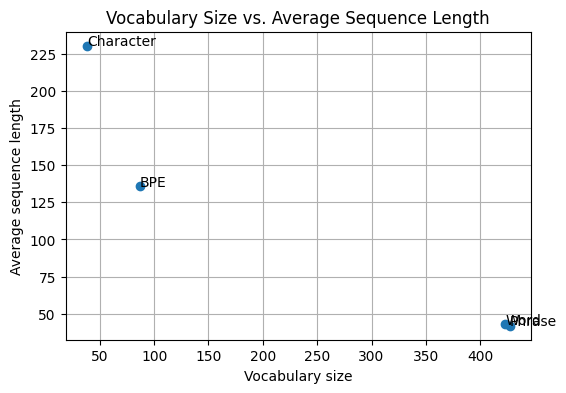

In [46]:
from collections import Counter
import matplotlib.pyplot as plt

# 1. Load and preprocess the corpus
with open('sample_text.txt', 'r', encoding='utf-8') as f:
    sample_text = f.read()
clean_text = preprocess_text(sample_text)

# Compute the number of sentences (use period as delimiter)
num_sentences = clean_text.count('.') if clean_text.count('.') > 0 else 1

# 2. Tokenize using the different strategies
char_tokens = char_tokenize(clean_text) 
word_tokens = word_tokenize(clean_text)

# Phrase-level tokenization
bigram_freqs = compute_bigram_frequencies(word_tokens)
# Select the top 5 bigrams by frequency
bigram_counter = Counter(bigram_freqs)
top_bigrams = [bigram for bigram, _ in bigram_counter.most_common(5)]
phrase_tokens = phrase_tokenize(word_tokens, top_bigrams)

# BPE-level tokenization
# Train BPE on the full list of word tokens
merges = bpe_train(word_tokens, 50)
bpe_tokens_corpus = []
for w in word_tokens:
    bpe_tokens_corpus.extend(bpe_encode(w, merges))

# 3. Compute metrics
# Vocabulary sizes
char_vocab_size = len(set(char_tokens))
word_vocab_size = len(set(word_tokens))
phrase_vocab_size = len(set(phrase_tokens))
bpe_vocab_size = len(set(bpe_tokens_corpus))

# Average sequence lengths
avg_char_length = len(char_tokens) / num_sentences
avg_word_length = len(word_tokens) / num_sentences
avg_phrase_length = len(phrase_tokens) / num_sentences
avg_bpe_length = len(bpe_tokens_corpus) / num_sentences

# Print results
print('Character tokenizer: vocab size =', char_vocab_size, ', avg sequence length =', avg_char_length)
print('Word tokenizer: vocab size =', word_vocab_size, ', avg sequence length =', avg_word_length)
print('Phrase tokenizer: vocab size =', phrase_vocab_size, ', avg sequence length =', avg_phrase_length)
print('BPE tokenizer: vocab size =', bpe_vocab_size, ', avg sequence length =', avg_bpe_length)

# 4. Visualization
labels = ['Character', 'Word', 'Phrase', 'BPE']
vocab_sizes = [char_vocab_size, word_vocab_size, phrase_vocab_size, bpe_vocab_size]
avg_lengths = [avg_char_length, avg_word_length, avg_phrase_length, avg_bpe_length]

plt.figure(figsize=(6,4))
plt.scatter(vocab_sizes, avg_lengths)
for i, label in enumerate(labels):
    plt.annotate(label, (vocab_sizes[i], avg_lengths[i]))
plt.title('Vocabulary Size vs. Average Sequence Length')
plt.xlabel('Vocabulary size')
plt.ylabel('Average sequence length')
plt.grid(True)
plt.show()


## 7. Notes & Observations

Briefly document takeaways about the trade‑offs between vocabulary size and sequence length across the four strategies. When is subword tokenization preferable to character‑ or word‑level approaches? How does phrase‑level merging compare in practice?


I can clearly identify the differences between vocabulary size and sequence length after implementing all four tokenization algorithms into practice. 

The smallest vocabulary is given by character-level tokenization, but because each character is turned into a token, very lengthy sequences are produced. Given that we are breaking down language into its most fundamental components, this makes sense. 

In contrast, word-level tokenization uses shorter sequences but a much larger vocabulary. The issue is that each variant of a word (for example, "rabbit" vs. "rabbits") counts as a distinct token, needlessly expanding our vocabulary.

Byte-Pair Encoding (BPE) is useful with 135 tokens per sentence and 87 vocabulary tokens. BPE is intelligent because it uses our data to identify frequent character patterns. For instance, if "er" appears frequently at the end of words, BPE will combine those characters into a single token. By dividing new words into well-known subword segments, this helps in handling words that weren't present in our training data.

Compared to word-level tokenization, phrase-level tokenization was not very useful. The majority of the words remained distinct because we only combined the top five bigrams. We would need to combine a lot more phrase patterns in order to notice any major improvements.

Overall, BPE appears to be the most effective method for practical applications since it manages unfamiliar words through subword decomposition while striking a balance between vocabulary size and sequence length.

In [50]:
# ------------------------------------------------------------------------------
# Hidden tests (autograder)
# These tests will be used by the grading script to evaluate your solutions.
# Do not modify this cell! If you do, you may receive zero credit.
# ------------------------------------------------------------------------------

# Test preprocess_text
assert preprocess_text('Hello\nWorld!') == 'hello world!'
assert preprocess_text('A\nB\nC') == 'a b c'

# Test char_tokenize
assert char_tokenize('abc') == ['a','b','c']
assert char_tokenize('a b') == ['a',' ','b']

# Test word_tokenize
assert word_tokenize('hello world!') == ['hello','world!']
assert word_tokenize('multiple   spaces here') == ['multiple','spaces','here']

# Test compute_bigram_frequencies
bigrams_test = compute_bigram_frequencies(['the','cat','sat','on','the','mat'])
assert bigrams_test.get(('the','cat'),0) == 1 and bigrams_test.get(('cat','sat'),0) == 1

# Test phrase_tokenize
phrase_test = phrase_tokenize(['the','white','rabbit','ran'], [('white','rabbit')])
assert phrase_test == ['the','white_rabbit','ran']

# Test BPE training on a tiny corpus
simple_corpus = ['low','lowest','newest','wider']
merges_test = bpe_train(simple_corpus, num_merges=10)
# The first merge in standard BPE for this corpus should be ('e','s') or ('l','o'), depending on frequency ties.
assert ('l','o') in merges_test or ('e','s') in merges_test

# Test BPE encoding on a simple word
encoded = bpe_encode('lowest', [('l','o'),('lo','w'),('e','s'),('es','t')])
assert isinstance(encoded, list) and len(encoded) > 0

print('All preliminary tests passed!')


All preliminary tests passed!
